Steps Performed:
1. Augumentation with the Standard Train Test
2. Word Cloud Exploration
3. Getting the most imformative words
4. Training the model with the Different Models
<br>    4.1 KNN Classifier
<br>    4.2 Decision Tree
<br>    4.3 Multinominal Naive Bayes
<br>    4.4 SVM
5. Comparison of Results
6. Writing the Results to JSON

In [3]:
# Set your working directory
from os import getcwd
import pandas as pd
import numpy as np
import pickle as pk
from nltk import stem
import json
from os import getcwd, chdir
import re
import numpy as np
import pickle as pk
import pandas as pd

from nltk.metrics import ConfusionMatrix
from nltk.classify import NaiveBayesClassifier, MaxentClassifier
from nltk.classify import accuracy
from nltk.tokenize import word_tokenize as wt

from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score

## 1. Augmentation with Standard Dataset

In [4]:
# open the files for negative and positive sentiment mining
ffile1 = open("E:\\EBAC\\12 Sentiment Mining\\Assignment\\Day 2\\Trainset.csv","r", encoding = 'utf-8',errors='ignore')

df_Train = pd.read_csv(ffile1)

In [5]:
df_Train['Sentiment'] = np.where(df_Train['Rating']>=40, 'positive', 'negative')

In [6]:
df_Train['Rating'] = df_Train['Rating']/10

In [7]:
ffile4 = open("E:\\EBAC\\12 Sentiment Mining\\Assignment\\Day 2\\train.csv","r", encoding = 'utf-8',errors='ignore')

df_Std_Train = pd.read_csv(ffile4)

In [8]:
df_Train.rename(columns={'Rating': 'stars'}, inplace=True)
df_Train.rename(columns={'Review_Content': 'text'}, inplace=True)

In [9]:
df_Std_Train.rename(columns={'date': 'Review_Date'}, inplace=True)
df_Std_Train.rename(columns={'restaurant_id': 'Restaurant_Name'}, inplace=True)
df_Std_Train.rename(columns={'review_id': 'Review_Title'}, inplace=True)

In [10]:
df_Merge_Train = df_Train.append(df_Std_Train,ignore_index=True)
df_Std_1_Train = df_Merge_Train

In [11]:
df_Std_1_Train.head()

,Restaurant_Name,Review_Date,Review_Title,Sentiment,Type,stars,text
0,"Shinji by Kanesaka, Singapore",3 October 2018,OMG what a sushi experience 💯,positive,Japnese,5.0,Had a quick impromptu business lunch and strol...
1,"Shinji by Kanesaka, Singapore",3 October 2018,Best Sushi,positive,Japnese,5.0,I have been to most Japanese restaurants in Si...
2,"Shinji by Kanesaka, Singapore",21 September 2018,Consistent,positive,Japnese,5.0,"You can never go wrong here. Always fresh, alw..."
3,"Shinji by Kanesaka, Singapore",19 September 2018,Expensive but worth the money,positive,Japnese,5.0,I had lunch with my colleague at the restauran...
4,"Shinji by Kanesaka, Singapore",30 August 2018,Expensive but excellent vaule for lunch,positive,Japnese,5.0,Heard so much about this restaurant. Was invit...


In [12]:
df_Merge_Train = df_Std_1_Train[['stars','text', 'Sentiment']]

In [13]:
df_Merge_Train['Sentiment_Tagging'] = np.where(df_Merge_Train['Sentiment']=='positive',1,-1)

E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
train_pos = [[row["text"], 1] for idx, row in df_Merge_Train.iterrows() if row["Sentiment"]=="positive"]
train_neg = [[row["text"], -1] for idx, row in df_Merge_Train.iterrows() if row["Sentiment"]=="negative"]

trainset = train_pos + train_neg
train_tokenized = [[wt(x), c] for x,c in trainset]

def word_feats(words):
    return dict([(word.lower(), True) for word in words])
train_featureset = [(word_feats(d), c) for (d,c) in train_tokenized] 

## 2. Word Cloud Exploration

In [14]:
import os
import json, codecs
import pickle
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, WordNetLemmatizer, bigrams, trigrams
from collections import Counter
import operator
from pytagcloud import make_tags, create_tag_image
from unicodedata import normalize
import webbrowser
from os import getcwd
import pandas as pd
import numpy as np
import pickle as pk
from nltk import stem
import json
from os import getcwd, chdir
import re
import numpy as np
import pickle as pk
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from IPython.display import display

from nltk.metrics import ConfusionMatrix
from nltk.classify import NaiveBayesClassifier, MaxentClassifier
from nltk.classify import accuracy
from nltk.tokenize import word_tokenize as wt


pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [24]:
#Pos_review = train_pos['text'].tolist()
#Neg_review = train_neg['text'].tolist()


train_pos_1 = df_Train[df_Train.Sentiment=="positive"]['text'].tolist()
train_neg_1= df_Train[df_Train.Sentiment=="negative"]['text'].tolist()

Complete_Pos = ' '.join(train_pos_1)
Complete_Neg = ' '.join(train_neg_1)

stop_words = nltk.corpus.stopwords.words('english')
WNlemma = nltk.WordNetLemmatizer()
stop = pickle.load(open("E:\\EBAC\\12 Sentiment Mining\\Assignment\\Day 2\\stopwords.pickle","rb"))
New_stop_words = ['u','...',"n't","'s",'wa','ha',"'ve","would",'also','came','made','much','make','see','5',
                 'ever',':','ive','indian','india','peach','food','south','hawker','kailash','pepper','dim','chilli',
                 'raffle','mustafa','marina','crab','duck','japanese','ala','newton','visit','year','singapore','waku',
                 'sea','sashimi','can','yum','menu','can','beach','pani','idly', 'can not','s','t','fish','head','road',
                 'xiao','shop','idli','caramel','pistachio',
                 'carte','back','shrimp','lau','ngee','city','foie','chicken','chee','next','urchin','french','soup']
stop_words.extend(stop)
stop_words.extend(New_stop_words)

# Create your Wordcloud function. You can re-use this code to create your own wordclouds
import string
translator = str.maketrans('', '', string.punctuation)


In [25]:
def create_cloud (text, max_words, width, height, bigram=True):
    
    text_nopunc = str(text).translate(translator)
    text_lower = text_nopunc.lower()
    text_nostop=" ".join(filter(lambda word: word not in stop_words, text_lower.split()))


    wnl = WordNetLemmatizer()
    tokens = word_tokenize(text_nostop)
    text_lem=" ".join([wnl.lemmatize(t) for t in tokens])
    tokens_lem = word_tokenize(text_lem)
    tokens_lem= [ t for t in tokens_lem if len(t) > 3 ]
    my_bigrams = bigrams(tokens_lem)
    #print(my_bigrams)
    
    if bigram:
        bigram_merged=list()
        for line in my_bigrams:
            bigram_merged.append(line[0]+' ' + line[1])
        counts = Counter(bigram_merged)
    else:
        counts = Counter(tokens_lem)
        
    #print(bigram_merged)
    
    word_could_dict=Counter(bigram_merged)
    Initial_wc = WordCloud(max_words=max_words, background_color = 'white',
                           width=4000,
                           height=2000
                           ).generate_from_frequencies(word_could_dict)
    
    print("Bigram word-cloud")
    plt.figure( figsize=(20,20) )
    plt.imshow(Initial_wc)
    plt.axis('off')
    plt.show()
    

In [26]:
def create_cloud_tri (text, max_words, width, height, trigram=True):
    text_nopunc = str(text).translate(translator)
    text_lower = text_nopunc.lower()
    text_nostop=" ".join(filter(lambda word: word not in stop_words, text_lower.split()))
    tokens = word_tokenize(text_nostop)
    wnl = WordNetLemmatizer()
    text_lem=" ".join([wnl.lemmatize(t) for t in tokens])
    tokens_lem = word_tokenize(text_lem)
    tokens_lem= [ t for t in tokens_lem if len(t) > 3 ]
    my_trigrams = trigrams(tokens_lem)
    if trigram:
        trigram_merged=list()
        for line in my_trigrams:
            trigram_merged.append(line[0]+' ' + line[1]+' ' + line[2])
        counts = Counter(trigram_merged)
    else:
        counts = Counter(tokens_lem)
        
    word_could_dict=Counter(trigram_merged)
    Initial_wc = WordCloud(max_words=max_words,background_color = 'white',
                           width=8000,
                           height=4000
                           ).generate_from_frequencies(word_could_dict)
    
    print("Trigram word-cloud")
    plt.figure( figsize=(20,20) )
    plt.imshow(Initial_wc)
    plt.axis('off')
    plt.show()

Bigram word-cloud


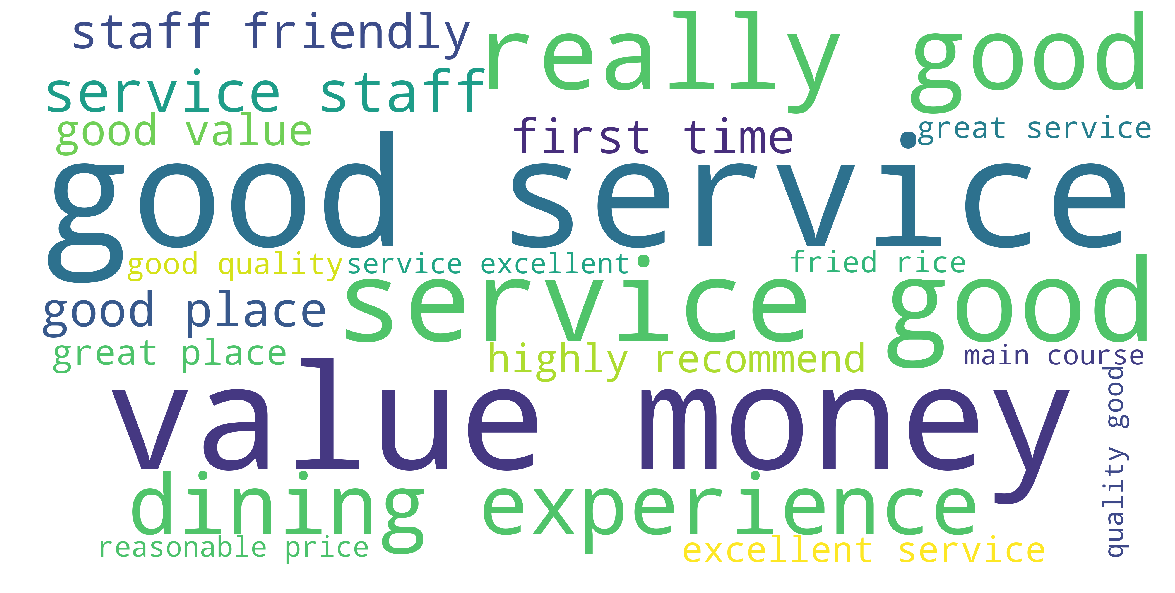

In [27]:
create_cloud(Complete_Pos, 20, 800, 400)

Bigram word-cloud


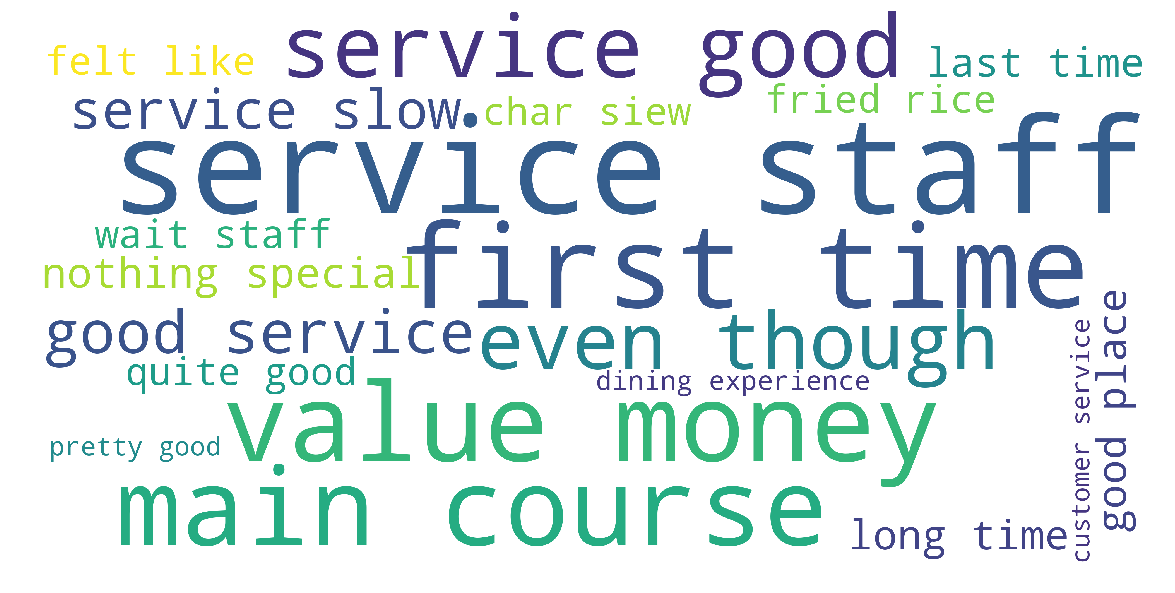

In [33]:
create_cloud(Complete_Neg, 20, 800, 400)

Trigram word-cloud


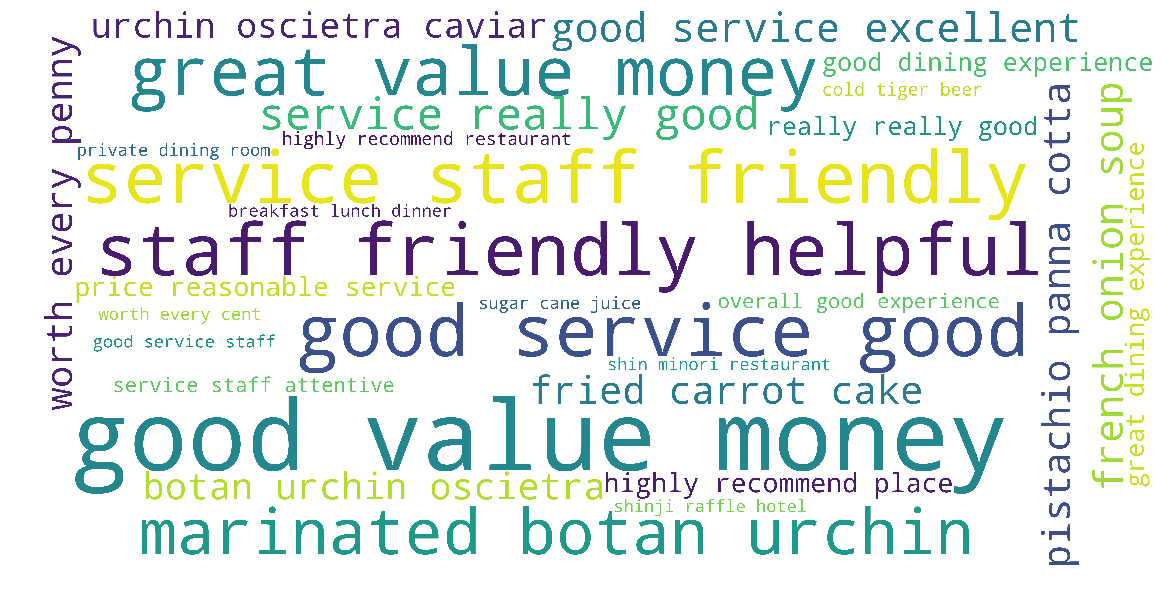

In [34]:
create_cloud_tri(Complete_Pos, 30, 800, 400)

Trigram word-cloud


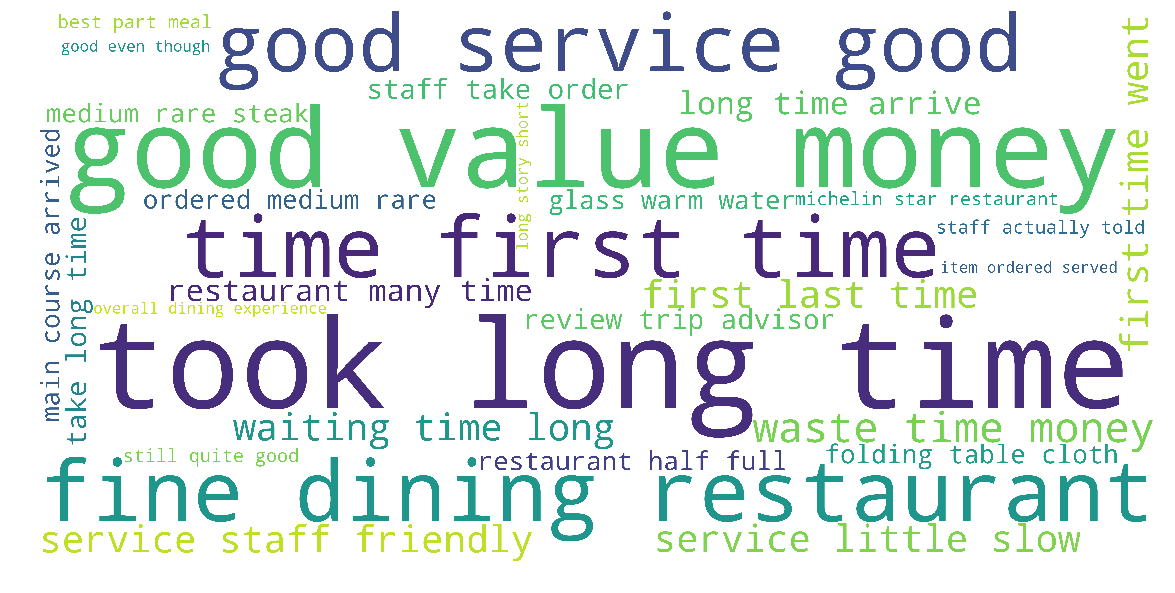

In [35]:
create_cloud_tri(Complete_Neg, 30, 800, 400)

## 3. Training with different Models
3.1 Naive Bayes Model

In [15]:
## Naive Bayes Rule using nltk for STANDARD SET
classifier_nb = NaiveBayesClassifier.train(train_featureset)
#print("Accuracy :" +str(accuracy(classifier_nb, test_featureset)))
classifier_nb.show_most_informative_features(20)

## Preparing the data first 
train_nolab = [t[0] for t in trainset]
train_lab = [t[1] for t in trainset]

# Create your tf-idf function
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_nolab)

## train Naive Bayes Rule using sklearn
clf = MultinomialNB().fit(train_vectors, train_lab)

predNB = clf.predict(train_vectors)
pred = list(predNB)
cm2=pd.crosstab( pd.Series(train_lab), pd.Series(pred), rownames= ['actuals'], colnames=['pred'],margins=True)
display(cm2)

Most Informative Features
              flavorless = True               -1 : 1      =     47.4 : 1.0
            unacceptable = True               -1 : 1      =     44.6 : 1.0
                   terry = True                1 : -1     =     39.9 : 1.0
                  brazil = True               -1 : 1      =     32.9 : 1.0
               disgusted = True               -1 : 1      =     31.5 : 1.0
              microwaved = True               -1 : 1      =     30.8 : 1.0
               tasteless = True               -1 : 1      =     30.7 : 1.0
               redeeming = True               -1 : 1      =     30.1 : 1.0
                  insult = True               -1 : 1      =     28.0 : 1.0
                   worst = True               -1 : 1      =     27.4 : 1.0
                downhill = True               -1 : 1      =     26.8 : 1.0
            acknowledged = True               -1 : 1      =     26.8 : 1.0
              disgusting = True               -1 : 1      =     26.1 : 1.0

pred,-1,1,All
actuals,,,
-1,11385,1611,12996
1,1409,12085,13494
All,12794,13696,26490


Importing the test set dataset

In [16]:
# open the test file
ffile3 = open("E:\\EBAC\\12 Sentiment Mining\\Assignment\\Day 2\\Testset.csv","r", encoding = 'utf-8',errors='ignore')

df_Test = pd.read_csv(ffile3)
df_Test = df_Test[['Type','Restaurant_Name','Review_Title','Rating','Review_Date','Review_Content']]

In [17]:
df_Test['Sentiment'] = np.where(df_Test['Rating']>=40, 'positive', 'negative')

In [18]:
#df_Test = df_Test[['Rating','Review_Content', 'Sentiment']]

In [19]:
df_Test['Rating'] = df_Test['Rating']/10

In [20]:
df_Test.rename(columns={'Rating': 'stars'}, inplace=True)
df_Test.rename(columns={'Review_Content': 'text'}, inplace=True)

In [21]:
df_Test.dropna(inplace=True)

In [22]:
test_pos = [[row["text"], 1] for idx, row in df_Test.iterrows() if row["Sentiment"]=="positive"]
test_neg = [[row["text"], -1] for idx, row in df_Test.iterrows() if row["Sentiment"]=="negative"]
testset = test_pos + test_neg
test_nolab = [t[0] for t in testset]
test_lab = [t[1] for t in testset]
test_tokenized = [[wt(x), c] for x,c in testset]
test_featureset = [(word_feats(d), c) for (d,c) in test_tokenized] 
test_nolab_tok = [t[0] for t in test_featureset]  # need to transform to predict

test_vectors = vectorizer.transform(test_nolab)  

1. Naive Bayes Clasifier

In [22]:
# using split dataset
predNB = clf.predict(test_vectors)
predictions_nb = []
for t in test_nolab_tok:
    predictions_nb.append(classifier_nb.classify(t))
cm3=pd.crosstab( pd.Series(test_lab), pd.Series(predNB), rownames= ['actuals'], colnames=['pred'],margins=True)
print (cm3)
Accuracy = (cm3[1][1]+cm3[-1][-1])/(cm3[1][1]+(cm3[1][-1])+cm3[-1][1]+(cm3[-1][-1]))
print ("Accuracy is " + str(round(Accuracy,3)))
print (classification_report(predNB,  test_lab))

pred       -1     1   All
actuals                  
-1        709   357  1066
1         312  2667  2979
All      1021  3024  4045
Accuracy is 0.835
             precision    recall  f1-score   support

         -1       0.67      0.69      0.68      1021
          1       0.90      0.88      0.89      3024

avg / total       0.84      0.83      0.84      4045



In [21]:
# Using tf-idf as features for training
# sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

vectorizer = TfidfVectorizer()  # tf-idf compared to term-document matrix

# this is used below for training the SVM
train_vectors = vectorizer.fit_transform(train_nolab)   # uses the UGC data set to classify the downloaded texts from Yelp
test_vectors = vectorizer.transform(test_nolab)  
#pk.dump(vectorizer, open(fpath+"\\Data\\vectorise.pk","wb"))

# Ascertain shape of the sparse matrix
print ("Train matrix shape " + str(train_vectors.shape))
print ("Test matrix shape " + str(test_vectors.shape))


Train matrix shape (26490, 38466)
Test matrix shape (4045, 38466)


KNN classifier

In [24]:
def train_knn(X, y, k, weight):
    """
    Create and train the k-nearest neighbor.
    """
    knn = KNeighborsClassifier(n_neighbors = k, weights = weight, metric = 'cosine', algorithm = 'brute')
    knn.fit(X, y)
    return knn

kn = train_knn(train_vectors, train_lab, 3, 'distance')# k=20; distance weights - by inverse of distance
predKN = kn.predict(test_vectors)
pred = list(predKN)
cm6=pd.crosstab( pd.Series(test_lab), pd.Series(predKN), rownames= ['actuals'], colnames=['pred'],margins=True)
print(cm6)
print (classification_report(predKN,  test_lab))

pred       -1     1   All
actuals                  
-1        681   385  1066
1         936  2043  2979
All      1617  2428  4045
             precision    recall  f1-score   support

         -1       0.64      0.42      0.51      1617
          1       0.69      0.84      0.76      2428

avg / total       0.67      0.67      0.66      4045



Decision Tree

In [25]:
# sklearn
def train_dtc(X, y):
    """
    Create and train the Decision Tree Classifier.
    """
    dtc = DecisionTreeClassifier()
    dtc.fit(X, y)
    return dtc

dt = train_dtc(train_vectors, train_lab)
predDT = dt.predict(test_vectors)
pred = list(predDT)
cm6=pd.crosstab( pd.Series(test_lab), pd.Series(predDT), rownames= ['actuals'], colnames=['pred'],margins=True)
print(cm6)
print (classification_report(predDT,  test_lab))

pred       -1     1   All
actuals                  
-1        693   373  1066
1         760  2219  2979
All      1453  2592  4045
             precision    recall  f1-score   support

         -1       0.65      0.48      0.55      1453
          1       0.74      0.86      0.80      2592

avg / total       0.71      0.72      0.71      4045



#### SVM from SKLEARN 
Using RBF Kernal

In [26]:
# SVM Classifier from sklearn
def train_svm(X, y):
    """
    Create and train the Support Vector Machine.
    """
    svm = SVC(C=10000.0, gamma='auto', kernel='rbf',probability=True)
    svm.fit(X, y)
    return svm

# Pickled model as it takes ahwile for generation
classifier_svm = train_svm(train_vectors, train_lab)  # training the SVM model
pk.dump(classifier_svm, open("classifier_svm.pk","wb"))
results = classifier_svm.predict_proba(test_vectors)
predSVM = classifier_svm.predict(test_vectors) 
pred_svm = list(predSVM)

cm6=pd.crosstab( pd.Series(test_lab), pd.Series(pred_svm), rownames= ['actuals'], colnames=['pred'],margins=True)
print (cm6)
print (classification_report(pred_svm,  test_lab))

pred       -1     1   All
actuals                  
-1        814   252  1066
1         322  2657  2979
All      1136  2909  4045
             precision    recall  f1-score   support

         -1       0.76      0.72      0.74      1136
          1       0.89      0.91      0.90      2909

avg / total       0.86      0.86      0.86      4045



Using Linear Kernel

In [27]:
score = []
for i in results:
    score.append(i[1]-i[0])

In [28]:
m = np.asarray(score)
df_Test["Score"] = m

SVM with Linear Kernel

In [30]:
# SVM Classifier from sklearn
def train_svm(X, y):
    """
    Create and train the Support Vector Machine.
    """
    svm = SVC(C=0.1, gamma='auto', kernel='linear',probability=True)
    svm.fit(X, y)
    return svm

# Pickled model as it takes ahwile for generation
classifier_svm = train_svm(train_vectors, train_lab)  # training the SVM model
pk.dump(classifier_svm, open("classifier_svm.pk","wb"))
#classifier_svm = pk.load(open("classifier_svm.pk", "rb"))
predSVM = classifier_svm.predict(test_vectors) 
pred_svm = list(predSVM)

cm6=pd.crosstab( pd.Series(test_lab), pd.Series(pred_svm), rownames= ['actuals'], colnames=['pred'],margins=True)
print (cm6)
print (classification_report(pred_svm,  test_lab))

pred       -1     1   All
actuals                  
-1        795   271  1066
1         318  2661  2979
All      1113  2932  4045
             precision    recall  f1-score   support

         -1       0.75      0.71      0.73      1113
          1       0.89      0.91      0.90      2932

avg / total       0.85      0.85      0.85      4045



SVM with K best Features

In [31]:
from sklearn.feature_selection import chi2

ch21 = SelectKBest(chi2, k=5000)
# Transform your training and testing datasets accordingly
train_Kbest = ch21.fit_transform(train_vectors, train_lab)
test_Kbest = ch21.transform(test_vectors)

# Train your SVM with the k best selected features
sv = train_svm(train_Kbest, train_lab)
predSVM= sv.predict(test_Kbest)
pred = list(predSVM)
cm8 = confusion_matrix(pred, test_lab)
print (cm8)
print (accuracy_score(pred, test_lab))
print (classification_report(pred,  test_lab))

[[ 788  307]
 [ 278 2672]]
0.8553770086526576
             precision    recall  f1-score   support

         -1       0.74      0.72      0.73      1095
          1       0.90      0.91      0.90      2950

avg / total       0.85      0.86      0.85      4045





#### Pipeling for SVD

In [23]:
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

In [24]:
svd = TruncatedSVD(3200)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

In [25]:
X_lsa = lsa.fit_transform(train_vectors)
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 80%


In [26]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(copy=False)
X_lsa = min_max.fit_transform(X_lsa)

In [27]:
lsa = make_pipeline(svd, normalizer)
X_lsa_test = lsa.transform(test_vectors)

SVM with Linear Kernal & SVD 

In [28]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([#('vect', CountVectorizer()),
                     #('tfidf', TfidfTransformer(use_idf=True)),
                      ('clf', svm.LinearSVC(C=0.05))
                    ])

In [51]:
text_clf.fit(X_lsa, train_lab) 

predicted = text_clf.predict(X_lsa_test)
print(confusion_matrix(predicted, test_lab))
print(np.mean(predicted == test_lab) )
#y_test.value_counts()

print(classification_report(test_lab, predicted))

[[ 733  224]
 [ 333 2755]]
0.8622991347342398
             precision    recall  f1-score   support

         -1       0.77      0.69      0.72      1066
          1       0.89      0.92      0.91      2979

avg / total       0.86      0.86      0.86      4045



SVM with RBF Kernel & SVD

In [ ]:
# SVM Classifier from sklearn
def train_svm(X, y):
    """
    Create and train the Support Vector Machine.
    """
    svm = SVC(C=100, gamma=0.01, kernel='rbf',probability=True)
    svm.fit(X, y)
    return svm

# Pickled model as it takes ahwile for generation
classifier_svm = train_svm(X_lsa, train_lab)   # training the SVM model
print(done)
pk.dump(classifier_svm, open("classifier_svm.pk","wb"))
results = classifier_svm.predict_proba(X_lsa_test)
print(done)
predSVM = classifier_svm.predict(X_lsa_test)
#pred_svm = list(predSVM)

cm6=pd.crosstab( pd.Series(test_lab), pd.Series(pred_svm), rownames= ['actuals'], colnames=['pred'],margins=True)
print (cm6)
print (classification_report(pred_svm,  test_lab))

## Comparison of Results
The results of all models were classified and presented

In [ ]:
from os import chdir, getcwd
fpath = getcwd()
print (fpath)
from IPython.display import Image
Image(filename=fpath + '\\results.jpeg', width=450, height=400)



## Writing the Results in JSON

In [ ]:
score = []
for i in results:
    score.append(i[1]-i[0])
m = np.asarray(score)
df_Test["Score"] = m
data=df_Test

In [ ]:
import json
data.columns=['index','type','name', 'Review_Title','stars','Review_Date','text','score' ]
reviewJSON= (data.groupby(['type']).apply(lambda x: x[['text', 'score']].to_dict('r')).reset_index().rename(columns={0:'reviews'}).to_json(orient='records'))
tempDF= pd.read_json(reviewJSON)
countDF= (data.groupby(['type', 'name']).size().reset_index())
mergedDF= pd.merge(countDF, tempDF, on='type')
mergedDF.columns=['cuisine','name','nb_reviews','reviews']
tempJSON= (mergedDF.groupby(['cuisine']).apply(lambda x: x[['name', 'nb_reviews', 'reviews']].to_dict('r')).reset_index()).to_json(orient='records')
tempDF= pd.read_json(tempJSON)
tempDF.index= tempDF['cuisine']
tempDF= tempDF['0']

finalJSON= tempDF.to_json()
jsonObject=json.loads(finalJSON)
finalJSON=json.dumps(jsonObject, indent=2)
fileObject = open("C:/Users/Rajan/Documents/Lab/Sentiment/Final Folder/reviews.json",'w')
fileObject.write(finalJSON)
fileObject.close()